<a href="https://colab.research.google.com/github/arhamk15/physics-projects/blob/main/Monte_Carlo_Fission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
L = 0.1 #m
a = 1.7e-2 #cm to m - mean free path neutron hitting another nucleus and bouncing off
b = 21e-2 # cm to m - mean free path between neutron hitting a nucleus and causing fission
R = np.sqrt(2*a*b) # rms distance that a neutron diffuses away from its starting point before causing a collision
n_fissions = 1000 # no. of intial fission runs

counter = 0

for fission in range(n_fissions):

  initial_position = L*np.random.random()

  for neutron in range(0,2):
    neutron_direction = np.random.random()
    if neutron_direction < 0.5:
      secondary_position = initial_position - R
    else:
      secondary_position = initial_position + R

    if 0 <= secondary_position <= L:
      counter += 1


print(counter/n_fissions)




0.328


In [ ]:
from math import cos, log, pi, sqrt
from numpy import random

def neutrons():
    """Number of secondary neutrons produced in each fission.

    Returns an integer number of neutrons, with average 2.5."""
    i=int(random.normal()+3)
    if (i<0): return 0
    else: return i

def diffusion():
    """Distance diffused by a neutron before causing fission.

    Returns a random number with probability density p(s) =
    s^2 exp(-3s^2/R^2). This distribution has a mean of 1, so
    multiply by R to get the physical distance."""
    a=cos(2.0*pi*random.random())
    return sqrt(-0.667*(log(random.random())+log(random.random())*a*a))*R


In [ ]:
samples = 75
Ls = np.linspace(0.1, 1, samples) #m
#print(Ls)
a = 1.7e-2 #cm to m - mean free path neutron hitting another nucleus and bouncing off
b = 21e-2 # cm to m - mean free path between neutron hitting a nucleus and causing fission
R = np.sqrt(2*a*b) # rms distance that a neutron diffuses away from its starting point before causing a collision
n_fissions = 100 # no. of intial fission runs

counts_for_L = []
results = []
#print(counts_per_L)

for L in Ls:
  total_counts_for_L= 0

  for fission_num in range(n_fissions):
    initial_position = L*np.random.random()
    counter = 0 # unique  counter for each set of n_fissions at each length

    # neutrons() gives the number of secondary neutrns
    for neutron_num in range(neutrons()):
      direction = np.random.random() # gives the random probability in a probability space [0,1] of a secondary neutron

      if direction < 0.5:
        secondary_position = initial_position - R

      else:
        secondary_position = initial_position + R

      if 0 <= secondary_position <= L:
        counter += 1

    total_counts_for_L += counter # allows us to have one value of summation of all runs rather than n_samples of columns in the array of 'results' - goves total number of fissions


  avg_fissions = total_counts_for_L/n_fissions  # this gives the prob of fission happening

  results.append([L,avg_fissions]) # be careful of indentations used here.


results = np.array(results)


print(results)

optimal = np.argmax(results, axis = 0)


print(optimal[1])
print('The optimal value of fissions is at L = ', Ls[optimal[1]])

 # 0.17297297 optimal value of length for stable chain fission.


'''
counts_per_L = np.array(counts_per_L)

counts_per_L = np.reshape(counts_per_L, (-1,n_fissions)) # for each value of L, we n_fissions simulated

counts_sum = np.sum(counts_per_L, axis = 1 )
counts_sum = np.concatenate([Ls.reshape(-1, 1), counts_sum.reshape(-1, 1)], axis = 1)

print(counts_sum)
#print(Ls)

optimal = np.argmax(counts_sum, axis = 0)
print(optimal)
print('The optimal value of fissions is at L = ', Ls[optimal])

#print(len(counts_per_L[0]))

#The optimal value of arounf L = 0.81 or 0.95 '''

[[0.1        0.47      ]
 [0.11216216 0.62      ]
 [0.12432432 0.93      ]
 [0.13648649 0.74      ]
 [0.14864865 1.24      ]
 [0.16081081 1.22      ]
 [0.17297297 1.27      ]
 [0.18513514 1.17      ]
 [0.1972973  1.48      ]
 [0.20945946 1.38      ]
 [0.22162162 1.7       ]
 [0.23378378 1.43      ]
 [0.24594595 1.72      ]
 [0.25810811 1.73      ]
 [0.27027027 1.75      ]
 [0.28243243 1.67      ]
 [0.29459459 1.63      ]
 [0.30675676 1.7       ]
 [0.31891892 1.74      ]
 [0.33108108 1.96      ]
 [0.34324324 1.88      ]
 [0.35540541 2.05      ]
 [0.36756757 1.8       ]
 [0.37972973 2.11      ]
 [0.39189189 1.96      ]
 [0.40405405 1.95      ]
 [0.41621622 1.87      ]
 [0.42837838 1.99      ]
 [0.44054054 1.91      ]
 [0.4527027  1.91      ]
 [0.46486486 2.08      ]
 [0.47702703 1.98      ]
 [0.48918919 2.14      ]
 [0.50135135 2.22      ]
 [0.51351351 1.94      ]
 [0.52567568 2.11      ]
 [0.53783784 2.07      ]
 [0.55       2.09      ]
 [0.56216216 2.07      ]
 [0.57432432 2.14      ]


"\ncounts_per_L = np.array(counts_per_L)\n\ncounts_per_L = np.reshape(counts_per_L, (-1,n_fissions)) # for each value of L, we n_fissions simulated\n\ncounts_sum = np.sum(counts_per_L, axis = 1 )\ncounts_sum = np.concatenate([Ls.reshape(-1, 1), counts_sum.reshape(-1, 1)], axis = 1)\n\nprint(counts_sum)\n#print(Ls)\n\noptimal = np.argmax(counts_sum, axis = 0)\nprint(optimal)\nprint('The optimal value of fissions is at L = ', Ls[optimal])\n\n#print(len(counts_per_L[0]))\n\n#The optimal value of arounf L = 0.81 or 0.95 "

In [ ]:
def phi_rand():
  return 2*np.pi*np.random.random()

def theta_rand():
  return np.arccos(2*np.random.random()-1)

def x_position(x, prob,s,theta,phi):
  ''' inital fission position => init_fiss_pos '''
  #s = diffusion()

  if prob > 0.5:
    return  x + s*(np.sin(theta) * np.cos( phi ))
  else:
    return  x - s*( np.sin( theta) * np.cos( phi ))


def y_position(y, prob,s,theta,phi):
  #s = diffusion()

  if prob > 0.5:
    return  y + s*( np.sin( theta) * np.sin( phi) )

  else:
    return  y - s*( np.sin( theta) * np.sin( phi ) )

def z_position(z, prob,s,theta,phi):
  #s = diffusion()
  if prob > 0.5:
    return  z + s*np.cos( theta)
  else:
    return  z - s*np.cos( theta )
def fission(n_fissions):
  counts_per_L = []
  joint_list = []

  for L in Ls:

    counts_per_fission = []


  # take into account different numbers of fissions

  #generate the number of secondary neutrons
    for i in range(n_fissions):

      x = L*np.random.random()
      y = L*np.random.random()
      z = L*np.random.random() # define the intial positions for each fission

      sec_neutrons = neutrons() # gives random no of neutrons
      counter = 0

      for fission_num in range(0,sec_neutrons):

        direction = np.random.random()

        s = diffusion() # make sure these are constant for all x,y,z so that you are able to get a critial length that doesnot change per run
        phi = phi_rand()
        theta = theta_rand()

        x_adj = x_position(x,direction,s,theta,phi)
        y_adj = y_position(y,direction,s,theta,phi)
        z_adj = z_position(z,direction,s,theta,phi)

        if 0 <= x_adj <= L and 0 <= y_adj <= L and 0 <= z_adj <= L:
          counter += 1

      counts_per_fission.append(counter) # unindented so get all n_fission's results !!!

    k_eff = np.mean(counts_per_fission)
    counts_per_L.append(k_eff)
    joint_list.append((L, k_eff))

  return counts_per_L,np.array(joint_list)

result = fission(100)
#print(r)
r = result[0]
print(result[1])
density = 18.7*1e3 # kg/m^3
r = np.array(r)
print(r)
idx = np.where( (r < 1.1) & (r > 0.9 ) )

critical_length = Ls[idx[0][0]]
print(idx[0][0])

critical_mass = density *(critical_length**3)
print(critical_mass)

[[0.1        0.53      ]
 [0.11216216 0.78      ]
 [0.12432432 0.69      ]
 [0.13648649 1.07      ]
 [0.14864865 1.03      ]
 [0.16081081 1.15      ]
 [0.17297297 1.22      ]
 [0.18513514 1.37      ]
 [0.1972973  1.39      ]
 [0.20945946 1.23      ]
 [0.22162162 1.11      ]
 [0.23378378 1.49      ]
 [0.24594595 1.62      ]
 [0.25810811 1.56      ]
 [0.27027027 1.51      ]
 [0.28243243 1.62      ]
 [0.29459459 1.66      ]
 [0.30675676 1.46      ]
 [0.31891892 1.75      ]
 [0.33108108 1.55      ]
 [0.34324324 1.71      ]
 [0.35540541 1.85      ]
 [0.36756757 1.77      ]
 [0.37972973 1.94      ]
 [0.39189189 1.89      ]
 [0.40405405 1.7       ]
 [0.41621622 2.12      ]
 [0.42837838 1.8       ]
 [0.44054054 1.74      ]
 [0.4527027  1.95      ]
 [0.46486486 2.02      ]
 [0.47702703 2.13      ]
 [0.48918919 1.9       ]
 [0.50135135 1.81      ]
 [0.51351351 1.95      ]
 [0.52567568 2.        ]
 [0.53783784 1.97      ]
 [0.55       2.03      ]
 [0.56216216 2.14      ]
 [0.57432432 2.15      ]


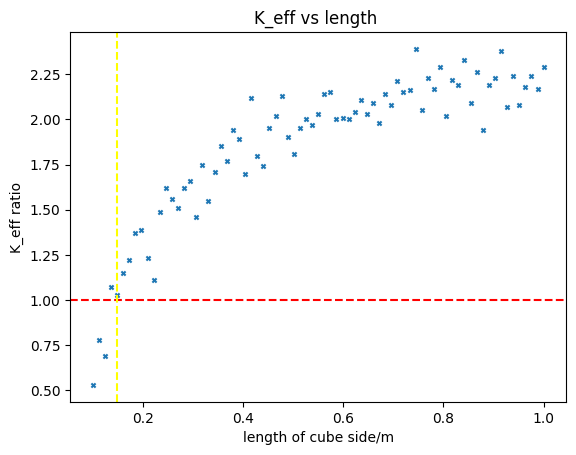

In [ ]:
plt.scatter(Ls,r,s = 9,marker='x')
plt.axhline(1, color = 'red', linestyle = '--')
plt.axvline(0.1475, color = 'yellow', linestyle = '--')
plt.xlabel('length of cube side/m')
plt.ylabel('K_eff ratio')
plt.title('K_eff vs length ')
plt.show()

# Section 1

In [ ]:
L = 0.1 #m
a = 1.7e-2 #cm to m - mean free path neutron hitting another nucleus and bouncing off
b = 21e-2 # cm to m - mean free path between neutron hitting a nucleus and causing fission
R = np.sqrt(2*a*b) # rms distance that a neutron diffuses away from its starting point before causing a collision
n_fissions = 1000 # no. of intial fission runs

counter = []


for i in range(n_fissions):

  initial_position = L*np.random.random()

  for i in range(0,2):
    i = np.random.random()
    if i < 0.5:
      secondary_position = initial_position - R
    else:
      secondary_position = initial_position + R

    if 0 <= secondary_position <= L:
      counter.append(1)






print(np.sum(counter)/n_fissions)




0.349


# Neutron and diffusion function from BlackBoard

In [ ]:
from math import cos, log, pi, sqrt
from numpy import random

def neutrons():
    """Number of secondary neutrons produced in each fission.

    Returns an integer number of neutrons, with average 2.5."""
    i=int(random.normal()+3)
    if (i<0): return 0
    else: return i

def diffusion():
    """Distance diffused by a neutron before causing fission.

    Returns a random number with probability density p(s) =
    s^2 exp(-3s^2/R^2). This distribution has a mean of 1, so
    multiply by R to get the physical distance."""
    a=cos(2.0*pi*random.random())
    return sqrt(-0.667*(log(random.random())+log(random.random())*a*a))*R


# Q2 updating initial code using neutron.py

In [ ]:
L = 0.1 #m
a = 1.7e-2 #cm to m - mean free path neutron hitting another nucleus and bouncing off
b = 21e-2 # cm to m - mean free path between neutron hitting a nucleus and causing fission
R = np.sqrt(2*a*b) # rms distance that a neutron diffuses away from its starting point before causing a collision
n_fissions = 100 # no. of intial fission runs

counter = []


for i in range(n_fissions):

  initial_position = L*np.random.random()

  # neutrons gives the number of secondary neutrons

  for i in range(0,neutrons()):
    i = np.random.random()
    if i < 0.5:
      secondary_position = initial_position - R
    else:
      secondary_position = initial_position + R

    if 0 <= secondary_position <= L:
      counter.append(1)






print(np.sum(counter)/n_fissions)


0.31


#Q.3

In [ ]:
samples = 75
Ls = np.linspace(0.1, 1, samples) #m
#print(Ls)
a = 1.7e-2 #cm to m - mean free path neutron hitting another nucleus and bouncing off
b = 21e-2 # cm to m - mean free path between neutron hitting a nucleus and causing fission
R = np.sqrt(2*a*b) # rms distance that a neutron diffuses away from its starting point before causing a collision
n_fissions = 200 # no. of intial fission runs

counts_for_L = []
results = []
#print(counts_per_L)

for L in Ls:
  total_counts_for_L= 0

  for fission_num in range(n_fissions):
    initial_position = L*np.random.random()
    counter = 0 # unique  counter for each set of n_fissions at each length

    # neutrons() gives the number of secondary neutrns

    for neutron_num in range(neutrons()):
      direction = np.random.random() # gives the random probability in a probability space [0,1] of a secondary neutron

      if direction < 0.5:
        secondary_position = initial_position - R

      else:
        secondary_position = initial_position + R

      if 0 <= secondary_position <= L:
        counter += 1

    total_counts_for_L += counter # allows us to have one value of summation of all runs rather than n_samples of columns in the array of 'results' - goves total number of fissions


  avg_fissions = total_counts_for_L/n_fissions  # this gives the prob of fission happening

  results.append([L,avg_fissions]) # be careful of indentations used here.


results = np.array(results)


print(results)

optimal = np.argmax(results, axis = 0)
print(optimal[1])
print('The optimal value of fissions is at L = ', Ls[optimal[1]])

 # 0.17297297 optimal value of length for stable chain fission.


'''
counts_per_L = np.array(counts_per_L)

counts_per_L = np.reshape(counts_per_L, (-1,n_fissions)) # for each value of L, we n_fissions simulated

counts_sum = np.sum(counts_per_L, axis = 1 )
counts_sum = np.concatenate([Ls.reshape(-1, 1), counts_sum.reshape(-1, 1)], axis = 1)

print(counts_sum)
#print(Ls)

optimal = np.argmax(counts_sum, axis = 0)
print(optimal)
print('The optimal value of fissions is at L = ', Ls[optimal])

#print(len(counts_per_L[0]))

#The optimal value of arounf L = 0.81 or 0.95 '''

[[0.1        0.325     ]
 [0.11216216 0.62      ]
 [0.12432432 0.86      ]
 [0.13648649 0.985     ]
 [0.14864865 1.03      ]
 [0.16081081 1.175     ]
 [0.17297297 1.28      ]
 [0.18513514 1.42      ]
 [0.1972973  1.38      ]
 [0.20945946 1.365     ]
 [0.22162162 1.51      ]
 [0.23378378 1.655     ]
 [0.24594595 1.495     ]
 [0.25810811 1.65      ]
 [0.27027027 1.65      ]
 [0.28243243 1.695     ]
 [0.29459459 1.58      ]
 [0.30675676 1.73      ]
 [0.31891892 1.875     ]
 [0.33108108 1.93      ]
 [0.34324324 1.875     ]
 [0.35540541 1.94      ]
 [0.36756757 1.795     ]
 [0.37972973 1.96      ]
 [0.39189189 2.11      ]
 [0.40405405 2.01      ]
 [0.41621622 1.96      ]
 [0.42837838 2.145     ]
 [0.44054054 1.91      ]
 [0.4527027  1.985     ]
 [0.46486486 2.13      ]
 [0.47702703 2.06      ]
 [0.48918919 2.005     ]
 [0.50135135 2.225     ]
 [0.51351351 2.01      ]
 [0.52567568 2.095     ]
 [0.53783784 2.27      ]
 [0.55       2.22      ]
 [0.56216216 2.03      ]
 [0.57432432 2.27      ]


"\ncounts_per_L = np.array(counts_per_L)\n\ncounts_per_L = np.reshape(counts_per_L, (-1,n_fissions)) # for each value of L, we n_fissions simulated\n\ncounts_sum = np.sum(counts_per_L, axis = 1 )\ncounts_sum = np.concatenate([Ls.reshape(-1, 1), counts_sum.reshape(-1, 1)], axis = 1)\n\nprint(counts_sum)\n#print(Ls)\n\noptimal = np.argmax(counts_sum, axis = 0)\nprint(optimal)\nprint('The optimal value of fissions is at L = ', Ls[optimal])\n\n#print(len(counts_per_L[0]))\n\n#The optimal value of arounf L = 0.81 or 0.95 "

# Q.4 Writing 3-D program

In [ ]:
def phi_rand():
  return 2*np.pi*np.random.random()

def theta_rand():
  return np.arccos(2*np.random.random()-1)



samples = 50
Ls = np.linspace(0.1, 1, samples) #m
#print(Ls)
a = 1.7e-2 #cm to m - mean free path neutron hitting another nucleus and bouncing off
b = 21e-2 # cm to m - mean free path between neutron hitting a nucleus and causing fission
R = np.sqrt(2*a*b) # rms distance that a neutron diffuses away from its starting point before causing a collision
n_fissions = 500 # no. of intial fission runs

counts_for_L = []
results = []
#print(counts_per_L)

for L in Ls:
  total_counts_for_L= 0

  for fission_num in range(n_fissions):
    initial_position = L*np.random.random()
    counter = 0 # unique  counter for each set of n_fissions at each length

    # neutrons() gives the number of secondary neutrns

    for neutron_num in range(neutrons()):
      direction = np.random.random() # gives the random probability in a probability space [0,1] of a secondary neutron

      if direction < 0.5:
        secondary_position = initial_position - R

      else:
        secondary_position = initial_position + R

      if 0 <= secondary_position <= L:
        counter += 1

    total_counts_for_L += counter # allows us to have one value of summation of all runs rather than n_samples of columns in the array of 'results'


  avg_fissions = total_counts_for_L/n_fissions  # this gives the prob of fission happening

  results.append([L,avg_fissions]) # be careful of indentations used here.


results = np.array(results)


print(results)

optimal = np.argmax(results, axis = 0)
print(optimal[1])
print('The optimal value of fissions is at L = ', Ls[optimal[1]])




[[0.1        0.426     ]
 [0.11836735 0.806     ]
 [0.13673469 0.936     ]
 [0.15510204 1.172     ]
 [0.17346939 1.264     ]
 [0.19183673 1.448     ]
 [0.21020408 1.52      ]
 [0.22857143 1.64      ]
 [0.24693878 1.682     ]
 [0.26530612 1.716     ]
 [0.28367347 1.788     ]
 [0.30204082 1.732     ]
 [0.32040816 1.912     ]
 [0.33877551 1.876     ]
 [0.35714286 1.886     ]
 [0.3755102  2.002     ]
 [0.39387755 1.838     ]
 [0.4122449  2.026     ]
 [0.43061224 2.056     ]
 [0.44897959 2.014     ]
 [0.46734694 2.052     ]
 [0.48571429 2.058     ]
 [0.50408163 2.08      ]
 [0.52244898 2.066     ]
 [0.54081633 2.142     ]
 [0.55918367 2.096     ]
 [0.57755102 2.244     ]
 [0.59591837 2.122     ]
 [0.61428571 2.138     ]
 [0.63265306 2.21      ]
 [0.65102041 2.12      ]
 [0.66938776 2.206     ]
 [0.6877551  2.206     ]
 [0.70612245 2.224     ]
 [0.7244898  2.168     ]
 [0.74285714 2.306     ]
 [0.76122449 2.288     ]
 [0.77959184 2.276     ]
 [0.79795918 2.286     ]
 [0.81632653 2.154     ]


### Drafts

In [ ]:
'''def fission():
  counts_for_L = []
  results = []
#print(counts_per_L)
for L in Ls:
  total_counts_for_L= 0

  for fission_num in range(n_fissions):
    initial_position = L*np.random.random()
    counter = 0 # unique  counter for each set of n_fissions at each length

    # neutrons() gives the number of secondary neutrns

    for neutron_num in range(neutrons()):
      direction = np.random.random() # gives the random probability in a probability space [0,1] of a secondary neutron

      if direction < 0.5:
        secondary_position = initial_position - R

      else:
        secondary_position = initial_position + R

      if 0 <= secondary_position <= L:
        counter += 1

    total_counts_for_L += counter # allows us to have one value of summation of all runs rather than n_samples of columns in the array of 'results'


  avg_fissions = total_counts_for_L/n_fissions  # this gives the prob of fission happening

  results.append([L,avg_fissions]) # be careful of indentations used here.


  results = np.array(results)


  print(results)

  optimal = np.argmax(results, axis = 0)
  print(optimal[1])
  print('The optimal value of fissions is at L = ', Ls[optimal[1]])'''

"def fission():\n  counts_for_L = []\n  results = []\n#print(counts_per_L)\nfor L in Ls:\n  total_counts_for_L= 0\n\n  for fission_num in range(n_fissions):\n    initial_position = L*np.random.random()\n    counter = 0 # unique  counter for each set of n_fissions at each length\n\n    # neutrons() gives the number of secondary neutrns\n\n    for neutron_num in range(neutrons()):\n      direction = np.random.random() # gives the random probability in a probability space [0,1] of a secondary neutron\n\n      if direction < 0.5:\n        secondary_position = initial_position - R\n\n      else:\n        secondary_position = initial_position + R\n\n      if 0 <= secondary_position <= L:\n        counter += 1\n\n    total_counts_for_L += counter # allows us to have one value of summation of all runs rather than n_samples of columns in the array of 'results'\n\n\n  avg_fissions = total_counts_for_L/n_fissions  # this gives the prob of fission happening\n\n  results.append([L,avg_fissions]) # 

# Q.4

In [ ]:
samples = 50
Ls = np.linspace(0.1,1,samples)
s = diffusion()

def phi_rand():
  return 2*np.pi*np.random.random()

def theta_rand():
  return np.arccos(2*np.random.random()-1)

def x_position(x, prob,s,theta,phi):
  ''' inital fission position => init_fiss_pos '''
  #s = diffusion()

  if prob > 0.5:
    return  x + s*(np.sin(theta) * np.cos( phi ))
  else:
    return  x - s*( np.sin( theta) * np.cos( phi ))


def y_position(y, prob,s,theta,phi):
  #s = diffusion()

  if prob > 0.5:
    return  y + s*( np.sin( theta) * np.sin( phi) )

  else:
    return  y - s*( np.sin( theta) * np.sin( phi ) )


def z_position(z, prob,s,theta,phi):
  #s = diffusion()
  if prob > 0.5:
    return  z + s*np.cos( theta)
  else:
    return  z - s*np.cos( theta )



def fission(n_fissions):
  counts_per_L = []

  for L in Ls:

    counts_per_fission = []


  # take into account different numbers of fissions

  #generate the number of secondary neutrons
    for i in range(n_fissions):

      x = L*np.random.random()
      y = L*np.random.random()
      z = L*np.random.random() # define the intial positions for each fission

      sec_neutrons = neutrons() # gives random no of neutrons
      counter = 0

      for fission_num in range(0,sec_neutrons):

        direction = np.random.random()

        s = diffusion() # make sure these are constant for all x,y,z so that you are able to get a critial length that doesnot change per run
        phi = phi_rand()
        theta = theta_rand()

        x_adj = x_position(x,direction,s,theta,phi)
        y_adj = y_position(y,direction,s,theta,phi)
        z_adj = z_position(z,direction,s,theta,phi)

        if 0 <= x_adj <= L and 0 <= y_adj <= L and 0 <= z_adj <= L:
          counter += 1

      counts_per_fission.append(counter) # unindented so get all n_fission's results !!!

    k_eff = np.mean(counts_per_fission)
    counts_per_L.append([L, k_eff])

  return np.array(counts_per_L)

r = fission(1000)
print(r)


[[0.1        1.174     ]
 [0.11836735 1.277     ]
 [0.13673469 1.433     ]
 [0.15510204 1.528     ]
 [0.17346939 1.515     ]
 [0.19183673 1.667     ]
 [0.21020408 1.72      ]
 [0.22857143 1.81      ]
 [0.24693878 1.84      ]
 [0.26530612 1.843     ]
 [0.28367347 1.86      ]
 [0.30204082 1.946     ]
 [0.32040816 1.93      ]
 [0.33877551 2.006     ]
 [0.35714286 1.975     ]
 [0.3755102  2.101     ]
 [0.39387755 2.079     ]
 [0.4122449  2.116     ]
 [0.43061224 2.079     ]
 [0.44897959 2.12      ]
 [0.46734694 2.225     ]
 [0.48571429 2.121     ]
 [0.50408163 2.177     ]
 [0.52244898 2.225     ]
 [0.54081633 2.153     ]
 [0.55918367 2.216     ]
 [0.57755102 2.207     ]
 [0.59591837 2.254     ]
 [0.61428571 2.217     ]
 [0.63265306 2.256     ]
 [0.65102041 2.25      ]
 [0.66938776 2.255     ]
 [0.6877551  2.23      ]
 [0.70612245 2.295     ]
 [0.7244898  2.198     ]
 [0.74285714 2.27      ]
 [0.76122449 2.245     ]
 [0.77959184 2.27      ]
 [0.79795918 2.257     ]
 [0.81632653 2.324     ]


#AI code

In [ ]:
samples = 30
Ls = np.linspace(0.1,1,samples)

def phi_rand():
    return 2*np.pi*np.random.random()

def theta_rand():
    return np.arccos(2*np.random.random() - 1)

# Corrected parentheses + correct argument order
def x_position(x, prob, s, theta, phi):
    if prob > 0.5:
        return x + s * np.sin(theta) * np.cos(phi)
    else:
        return x - s * np.sin(theta) * np.cos(phi)

def y_position(y, prob, s, theta, phi):
    if prob > 0.5:
        return y + s * np.sin(theta) * np.sin(phi)
    else:
        return y - s * np.sin(theta) * np.sin(phi)

def z_position(z, prob, s, theta, phi):
    if prob > 0.5:
        return z + s * np.cos(theta)
    else:
        return z - s * np.cos(theta)


def fission(n_fissions):
    counts_per_L = []

    for L in Ls:

        counts_per_fission = []

        for i in range(n_fissions):

            # new position per fission
            x = L*np.random.random()
            y = L*np.random.random()
            z = L*np.random.random()

            sec_neutrons = neutrons()
            counter = 0

            for _ in range(sec_neutrons):

                direction = np.random.random()

                # These must be ONE shared set of random parameters
                s = diffusion()
                theta = theta_rand()
                phi = phi_rand()

                # FIXED argument order
                x_adj = x_position(x, direction, s, theta, phi)
                y_adj = y_position(y, direction, s, theta, phi)
                z_adj = z_position(z, direction, s, theta, phi)

                if 0 <= x_adj <= L and 0 <= y_adj <= L and 0 <= z_adj <= L:
                    counter += 1

            counts_per_fission.append(counter)

        k_eff = np.mean(counts_per_fission)
        counts_per_L.append([L, k_eff])

    return np.array(counts_per_L)

r = fission(1000)   # >=800 makes result stable
print(r)


[[0.1        1.065     ]
 [0.13103448 1.314     ]
 [0.16206897 1.521     ]
 [0.19310345 1.609     ]
 [0.22413793 1.789     ]
 [0.25517241 1.926     ]
 [0.2862069  1.917     ]
 [0.31724138 2.002     ]
 [0.34827586 1.931     ]
 [0.37931034 2.022     ]
 [0.41034483 2.076     ]
 [0.44137931 2.044     ]
 [0.47241379 2.008     ]
 [0.50344828 2.147     ]
 [0.53448276 2.167     ]
 [0.56551724 2.152     ]
 [0.59655172 2.214     ]
 [0.62758621 2.149     ]
 [0.65862069 2.236     ]
 [0.68965517 2.221     ]
 [0.72068966 2.248     ]
 [0.75172414 2.251     ]
 [0.78275862 2.276     ]
 [0.8137931  2.317     ]
 [0.84482759 2.255     ]
 [0.87586207 2.349     ]
 [0.90689655 2.335     ]
 [0.93793103 2.259     ]
 [0.96896552 2.353     ]
 [1.         2.29      ]]


In [ ]:
samples = 30
Ls = np.linspace(0.1,1,samples)

def phi_rand():
  return 2*np.pi*np.random.random()

def theta_rand():
  return np.arccos(2*np.random.random()-1)

def x_position(x, prob):
  ''' inital fission position => init_fiss_pos '''
  s = diffusion()

  if prob > 0.5:
    x_adj =  x + s*np.sin( theta_rand()) * np.cos( phi_rand() )
  else:
    x_adj =  x - s*np.sin( theta_rand()) * np.cos( phi_rand() )

  return x_adj

def y_position(y, prob):
  s = diffusion()

  if prob > 0.5:
    y_adj =  y + s*np.sin( theta_rand()) * np.sin( phi_rand() )

  else:
    y_adj =  y - s*np.sin( theta_rand()) * np.sin( phi_rand() )

  return  y_adj

def z_position(z, prob):
  s = diffusion()
  if prob > 0.5:
    z_adj =  z + s*np.cos( theta_rand() )

  else:
    z_adj =  z - s*np.cos( theta_rand() )

  return z_adj

'''
x_adj = z_position(x)
y_adj = y_position(y)
z_adj = z_position(z)

positions = np.array([x_position(x), y_position(y), z_position(z)] )'''

def fission(n_fissions):
  counts_per_L = []

  for L in Ls:
    x = L*np.random.random()
    y = L*np.random.random()
    z = L*np.random.random()

    counts_per_fission = []


  # take into account different numbers of fissions

  #generate the number of secondary neutrons
    for i in range(n_fissions):
      sec_neutrons = neutrons()
      counter = 0

      for fission_num in range(0,sec_neutrons):
        direction = np.random.random()
        x_adj = x_position(x,direction)
        y_adj = y_position(y,direction)
        z_adj = z_position(z,direction)

        if 0 <= x_adj <= L and 0 <= y_adj <= L and 0 <= z_adj <= L:
          counter += 1

      counts_per_fission.append(counter) # unindented so get all n_fission's results !!!

    counts_per_L.append([L, np.sum(counts_per_fission)/n_fissions])

  return np.array(counts_per_L)

r = fission(100)
print(r)

plt.scatter(r)
plt.show()

[[0.1        1.18      ]
 [0.13103448 1.16      ]
 [0.16206897 2.09      ]
 [0.19310345 1.26      ]
 [0.22413793 2.51      ]
 [0.25517241 1.23      ]
 [0.2862069  1.25      ]
 [0.31724138 2.42      ]
 [0.34827586 2.36      ]
 [0.37931034 1.05      ]
 [0.41034483 2.18      ]
 [0.44137931 2.43      ]
 [0.47241379 2.37      ]
 [0.50344828 2.53      ]
 [0.53448276 2.52      ]
 [0.56551724 2.35      ]
 [0.59655172 2.8       ]
 [0.62758621 2.46      ]
 [0.65862069 2.7       ]
 [0.68965517 2.19      ]
 [0.72068966 1.38      ]
 [0.75172414 1.21      ]
 [0.78275862 2.56      ]
 [0.8137931  2.41      ]
 [0.84482759 1.52      ]
 [0.87586207 2.33      ]
 [0.90689655 2.41      ]
 [0.93793103 2.45      ]
 [0.96896552 2.08      ]
 [1.         2.51      ]]


TypeError: scatter() missing 1 required positional argument: 'y'

# Trying a numpy array appraoch rather than clunky loops which are difficult to scale and the number of samples increases a lot.

First get initial position of fission. Get n_samples of this using L*random.random(samples)

Then there are the secondary neutrons that also cause fission or simply donot. Generate these randomly
These can be > 0.5 or < 0.5 . Then we have a boolean codition. If < 0.5, -R; if > 0.5, + R.

This step is tricky because using a for and if statements seems more obvious. But np.where helps here but also can use simple maths with indexes to do this too

#Need to add method to count no of fission in each experiment

In [ ]:
L = 0.1 #m
a = 1.7e-2 #cm to m - mean free path neutron hitting another nucleus and bouncing off
b = 21e-2 # cm to m - mean free path between neutron hitting a nucleus and causing fission
R = np.sqrt(2*a*b) # rms distance that a neutron diffuses away from its starting point before causing a collision
n_fissions = 1000 # no. of intial fission runs

loc_fission = L*np.random.random(n_fissions) # locations of first fission

loc_second_fission = np.random.random(2* n_fissions) # location of neutrons -twice as many neutrons now than in first neutron fission - we apply the </> 0.5 condition to this array now to seperate it

# now we need a mask - is better than using for loops
left = loc_second_fission <  0.5 # indexes all neutrons moving to the left- datatype is boolean
right = ~left # indexed of neutrinos moving to right



# now we do the adjustment by R
'''left_direction = loc_second_fission[left] -R
right_direction =loc_second_fission[right] + R
#directions = np.concatenate( [left_direction, right_direction] )'''
# doesnot work we need array that has same values but twice over np.repeat does this and stored the same number adjacent to it. Very useful keeps original positions of neutrons where they should be.

#since 2 neutrons originate at same position, we need to use np.repeat() # https://numpy.org/doc/2.3/reference/generated/numpy.repeat.html



repeated_loc_fission = np.repeat(loc_fission, 2) # just initial fission locations array but each value is duplicated and adjacent to the value equivalent to it



left_direction = repeated_loc_fission[left] - R # those neutrions that are smaller than 0.5 are moving in the '-ve' x-direction from the place where they originated in loc_fission
right_direction = repeated_loc_fission[right] + R # those neutrinos that are larger than 0.5 are moving in the '+ve' x- direction

directions = np.concatenate( [left_direction, right_direction] ) # however order in which the numbers are stored is not the way they were in the repeated_loc_fission array. This array is simply for counting the number of fissions easily


#print(directions)

#counting number of fission happening
fission_count_per_run = [ np.sum( (direction >= 0 ) & ( direction <= L)) for direction in directions ]
fission_count = np.sum( (directions >= 0 ) & ( directions <= L) )

print('The number of secondary fission reactions is', fission_count)
print('The number of secondary fission reactions in each run fission run is', fission_count_per_run)

table = np.reshape(fission_count_per_run, (-1,10))
print(table)




In [ ]:
L = 0.1 #m
a = 1.7e-2 #cm - mean free path neutron hitting another nucleus and bouncing off
b = 21e-2 # cm - mean free path between neutron hitting a nucleus and causing fission

L_rand = L*np.random.random() # position where fission occurs
R = (2*a*b)**(1/2) # rms distance that a neutron diffuses away from its starting point before causing a collision

n_fissions = 3 # no of initial fission
n_secondary = 2 # no of secondary neutrons from collision

count = []

#try just one sample first and the make an array of 100 of such samples


samples = L*np.random.random(2)
print(samples)

mask = samples < 0.5
left = samples[mask] - R
right = samples[~mask] + R

samples = np.concatenate((left, right))
print(samples)
fission_count = np.sum( (samples <= L) & (samples >= 0) )
print(fission_count)









